In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('./QueryResults.csv')

## 도전

In [4]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.columns = ['DATE', 'TAG', 'POSTS']

In [6]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [7]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [8]:
df.shape

(1991, 3)

In [10]:
# 해설
# df = pd.read_csv('QueryResults.csv', names = ['DATE', 'TAG', 'POSTS'])

In [11]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

## 도전

TAG는 개발 언어의 이름입니다. 예를 들어, 2008년 7월에 C# 언어 태그가 지정된 게시물이 3개 있었습니다. TAG가 카테고리 열 역할을 한다고 했을 때 언어당 게시물 수를 계산하는 방법을 알 수 있을까요? 스택 오버플로우가 만들어진 이후 가장 많은 수의 게시물을 보유한 개발 언어는 무엇일까요? (힌트: 어제 강의 중 하나에 나와요.)

In [26]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


또한 일부 언어는 C만큼 오래되었고, Swift 같은 다른 언어는 더 새로운 것이죠. 데이터셋은 2008년 7월에 시작하므로 일부 언어는 매월 게시물이 전혀 없을 거에요. 각 개발 언어당 게시물이 몇 개월간 존재하는지 세볼 수 있나요?

In [25]:
df.groupby('TAG').count().sort_values('POSTS', ascending = False)

,DATE,POSTS
TAG,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


# 데이터 정리: 타임스탬프 작업

In [27]:
# 개별 셀 선택
df['DATE'][1]

'2008-08-01 00:00:00'

In [29]:
# 열 이름에 공백이 없는 경우 '.' 표기를 사용할 수 있음
df.DATE[1]

'2008-08-01 00:00:00'

In [30]:
# 데이터 유형 검사
type(df['DATE'][1])

str

In [31]:
# to_datetime() 사용하여 문자열 -> 타임스탬프 변환
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [32]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


# 데이터 조작: 데이터프레임 피벗하기

In [33]:
# 예시
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [35]:
pivoted_df = test_df.pivot(index = 'Age', columns = 'Actor', values = 'Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


### 간단 도전

df 데이터프레임을 피벗하여 각 행이 날짜가 되도록, 그리고 각 열이 개발 언어가 되도록 할 수 있나요? reshaped_df라는 변수에 결과를 저장하세요.

In [44]:
reshaped_df = df.pivot(index = 'DATE', columns = 'TAG', values = 'POSTS')

재구성된 데이터프레임의 크기를 알아보세요. 행이 몇 개 있나요? 열은 몇 개인가요?

In [45]:
reshaped_df.shape

(145, 14)

데이터프레임의 머리과 꼬리를 알아보세요. 어떤 모습인가요?

In [46]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [47]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


열의 이름을 출력해 보세요.

In [48]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

각 열의 항목 수를 계산하세요.

In [51]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [52]:
# NaN -> 0
reshaped_df.fillna(0, inplace = True)

In [53]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [54]:
# NaN 값이 남아 있는지 확인
reshaped_df.isna().values.any()

False

# 맷플롯립으로 데이터 시각화

In [55]:
import matplotlib.pyplot as plt

### 간단 도전

어떤 개발 언어의 인기도를 꺾은선형 차트로 보여줄 때 실제로 단 한 줄의 코드만으로 가능합니다. .plot() documentation을 사용해서 어떻게 할지 알아볼까요? 자바 개발 언어의 인기도를 표시해 보겠습니다.

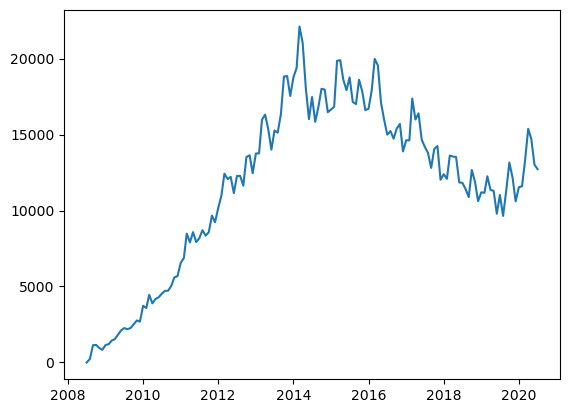

In [56]:
plt.plot(reshaped_df.index, reshaped_df['java'])

**차트 스타일 지정**

.figure() : 차트 사이즈 조정

.xticks() : x축 구성

.yticks() : y축 구성

.xlabel() : x축에 텍스트 추가

.ylabel() : y축에 텍스트 추가

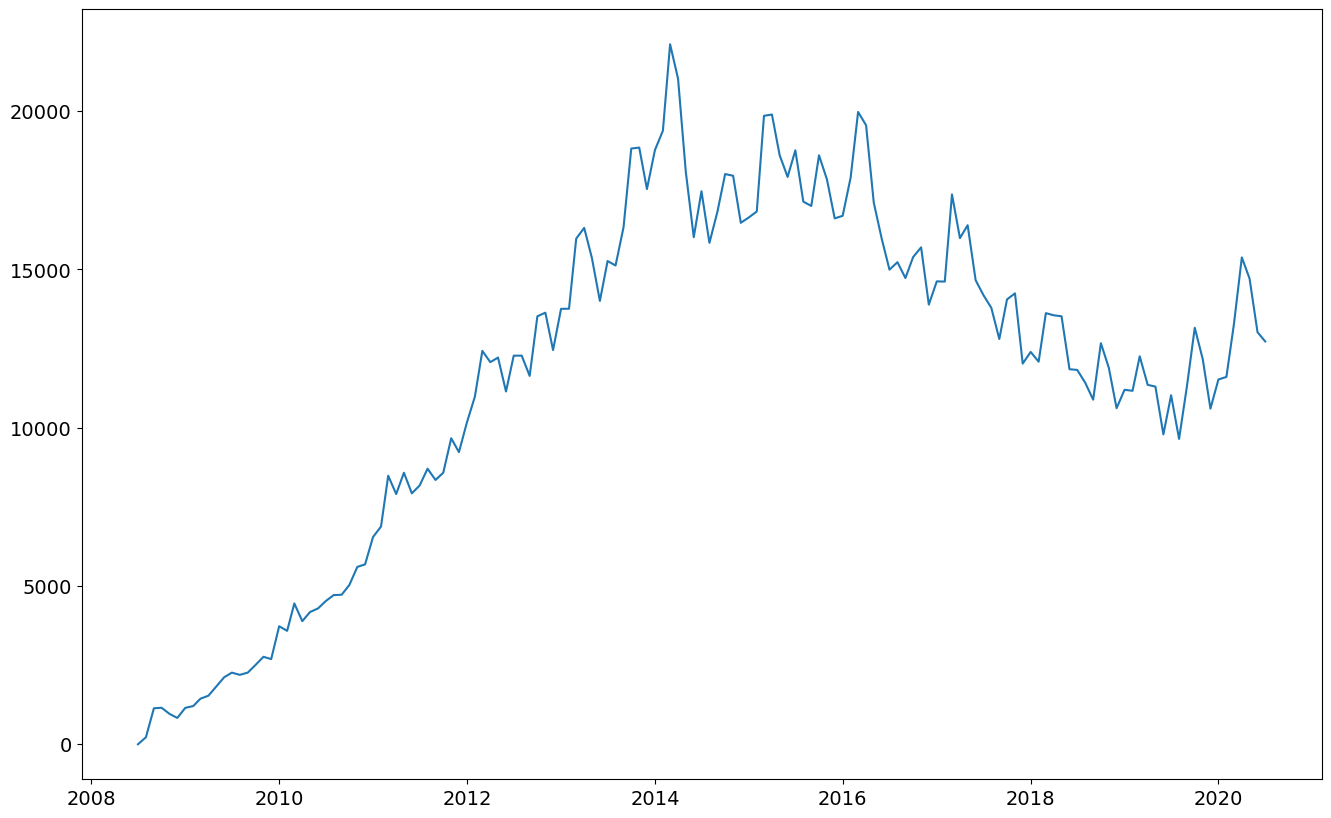

In [57]:
plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.plot(reshaped_df.index, reshaped_df.java)

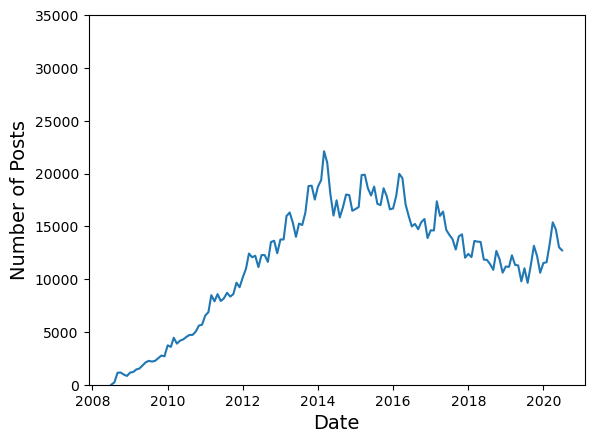

In [59]:
# 게시물은 0 밑이 될수 없으므로 y축 최저를 0으로 설정
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

## 도전

자바와 파이썬을 나란히 표시

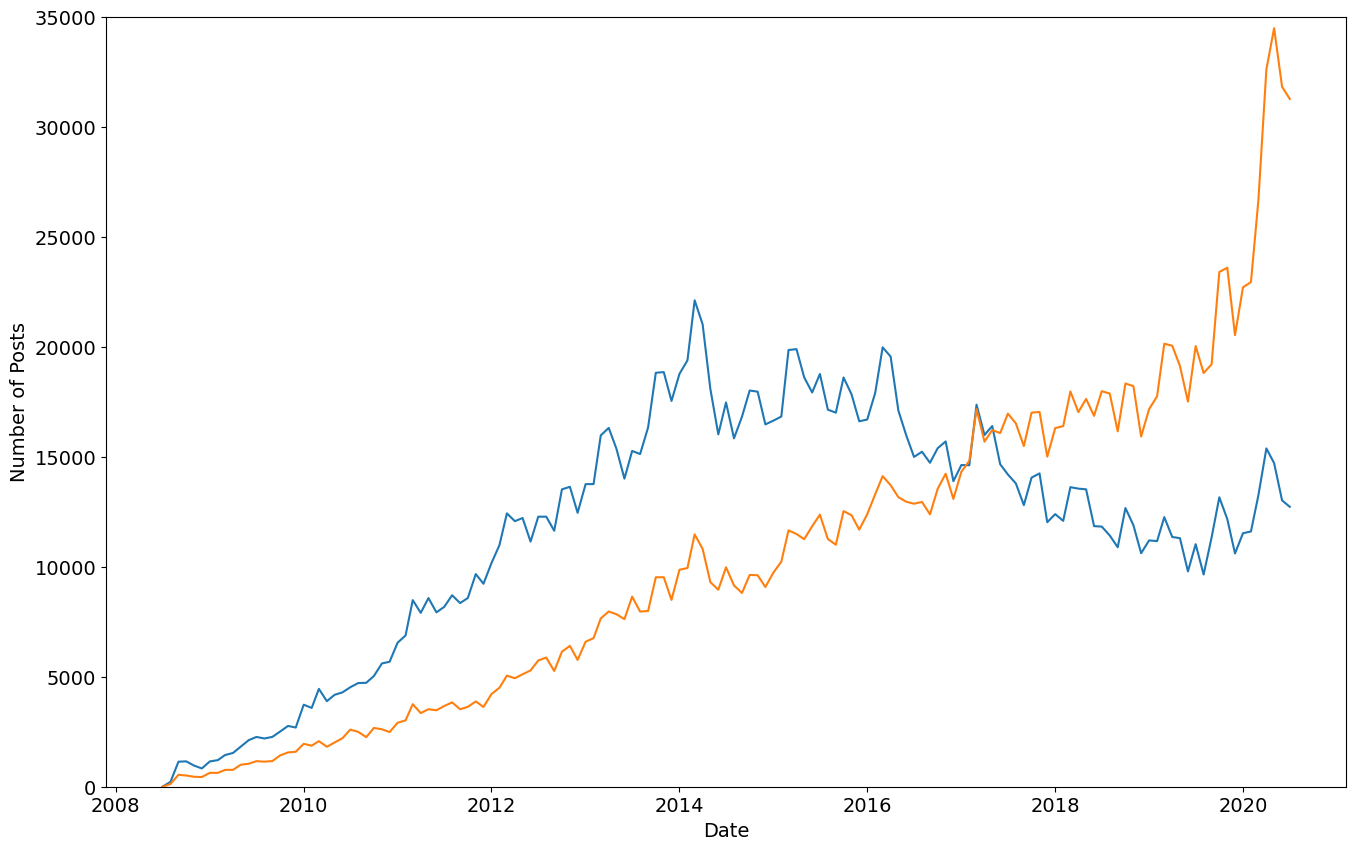

In [61]:
plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

# 맷플롯립을 이용한 다중 선형 차트

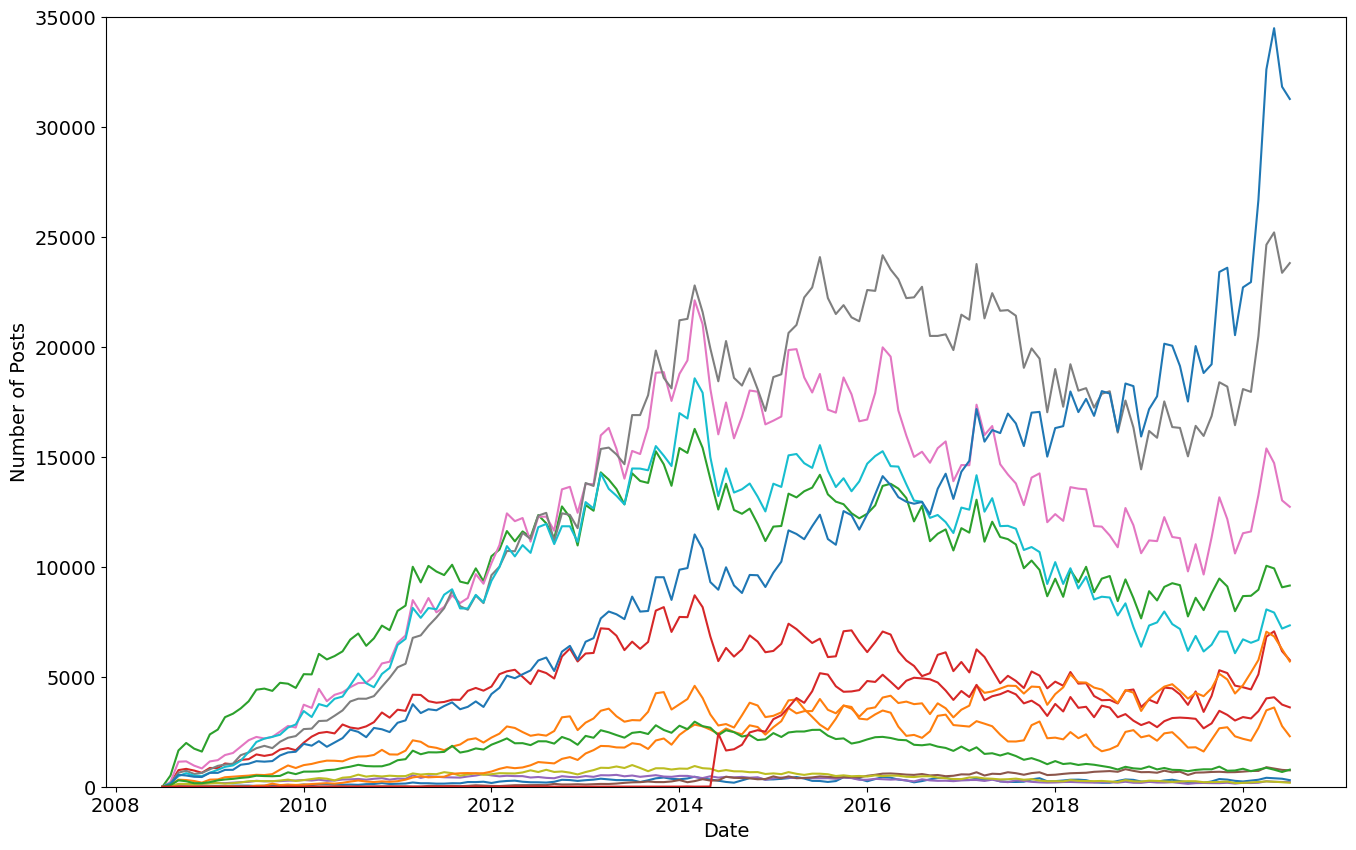

In [63]:
# 모든 개발 언어를 동일한 차트에 표시하려면
plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

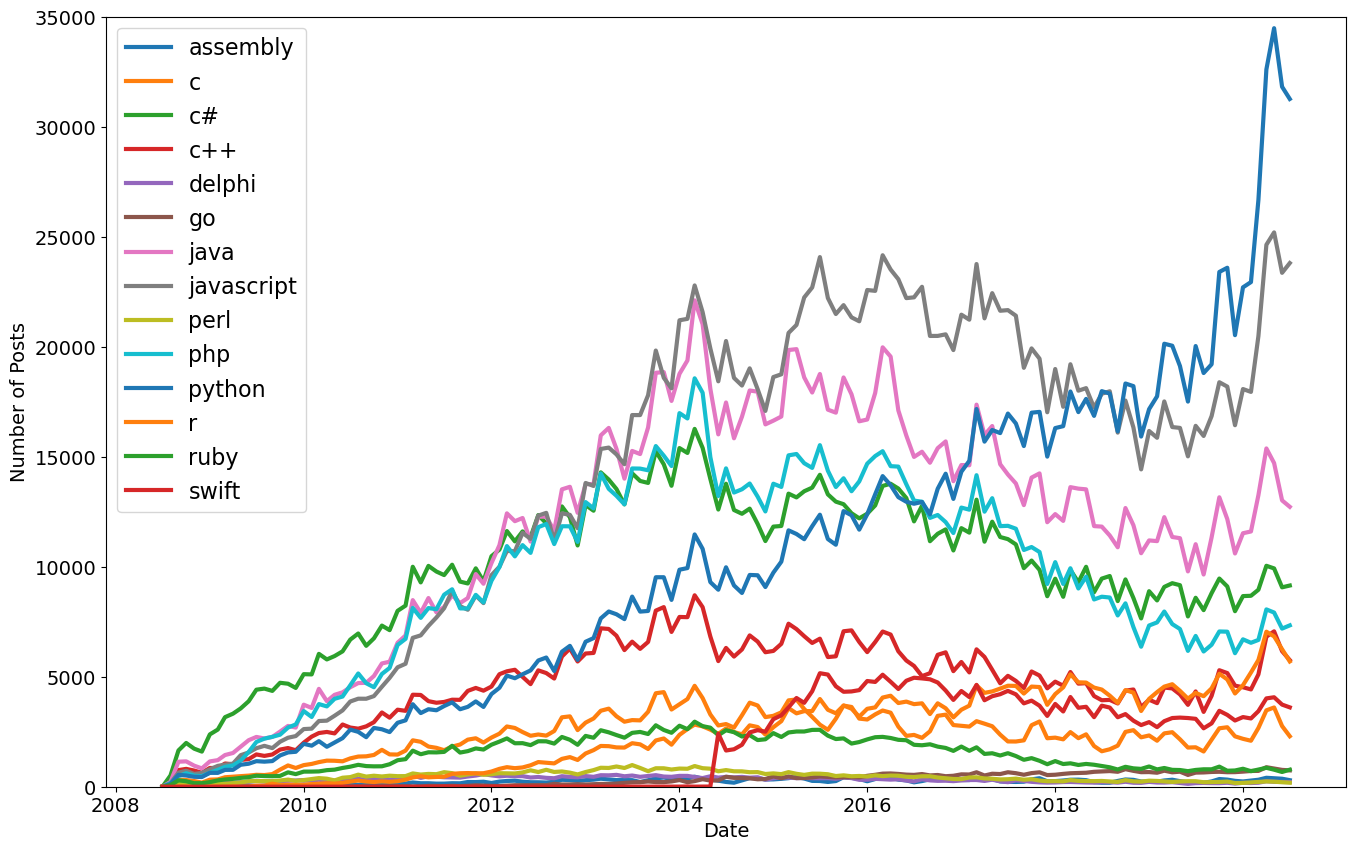

In [64]:
# 열 이름을 기반으로 각 줄에 레이블을 추가하도록 
#그리고 linewidth를 이용해서 선을 더 굵게
# 그런 다음 차트에 범례를 추가

plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth = 3, label = reshaped_df[column].name)

plt.legend(fontsize = 16)
    

# 시계열 데이터 다듬기

추세를 명확하게 보여주는 유용한 기술은 평균을 취하여 관측치를 평균화하는 것입니다. 6개 또는 12개의 관측값을 평균화하여 이동평균이라고 하는 것을 구성할 수 있습니다. 기본적으로 시간 단위로 평균을 계산하고 한번에 한 관측값씩 앞으로 이동합니다.

이것은 매우 일반적인 기술이기 때문에 실제로 판다스는 실제로 편리한 이 두가지 rolling()와 mean() 메소드를 내장하고 있습니다. 이 두 가지 메소드를 연결하여 평균 관측값으로 구성된 데이터프레임을 만들 수 있습니다.

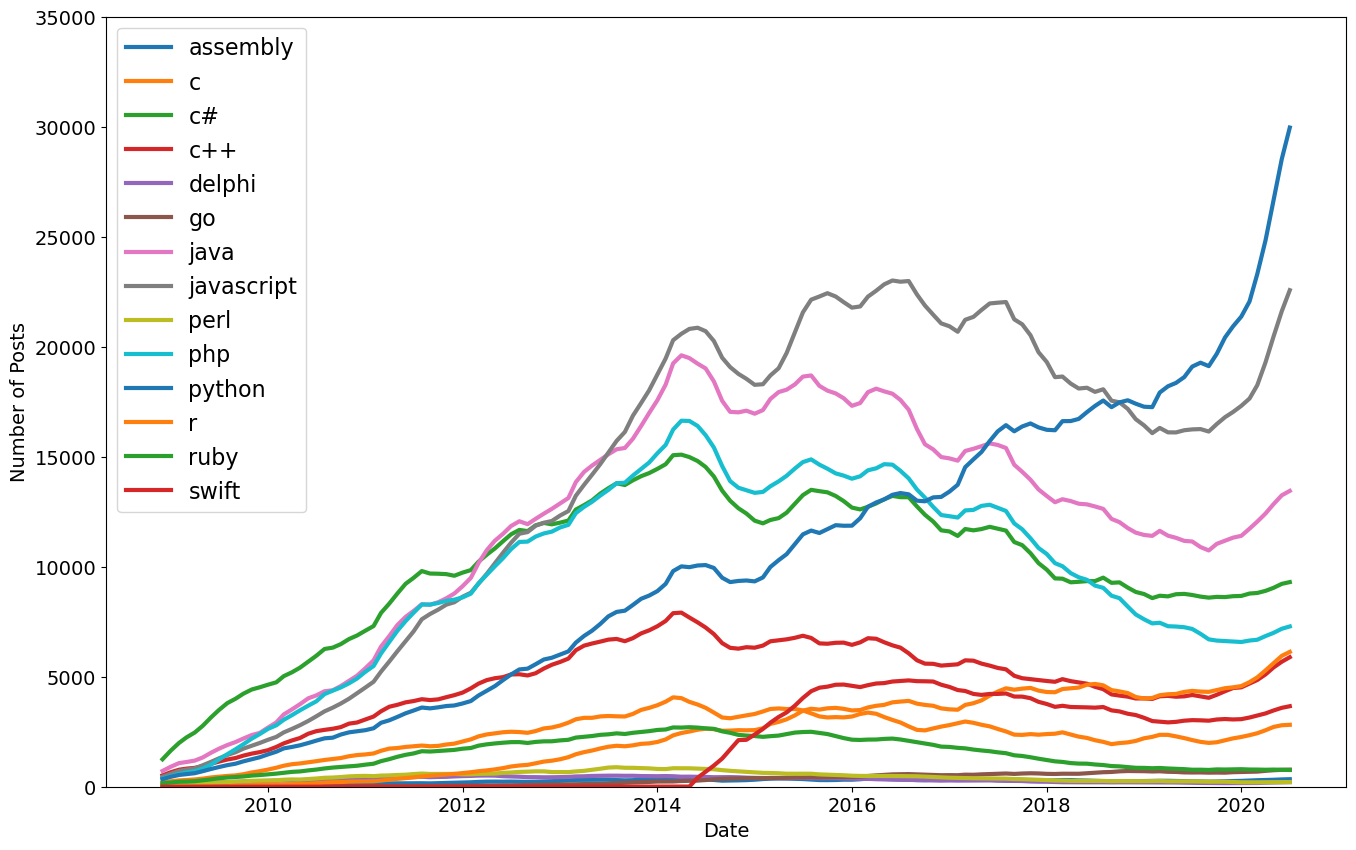

In [69]:
roll_df = reshaped_df.rolling(window = 6).mean()

plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth = 3, label = roll_df[column].name)
    
plt.legend(fontsize = 16)

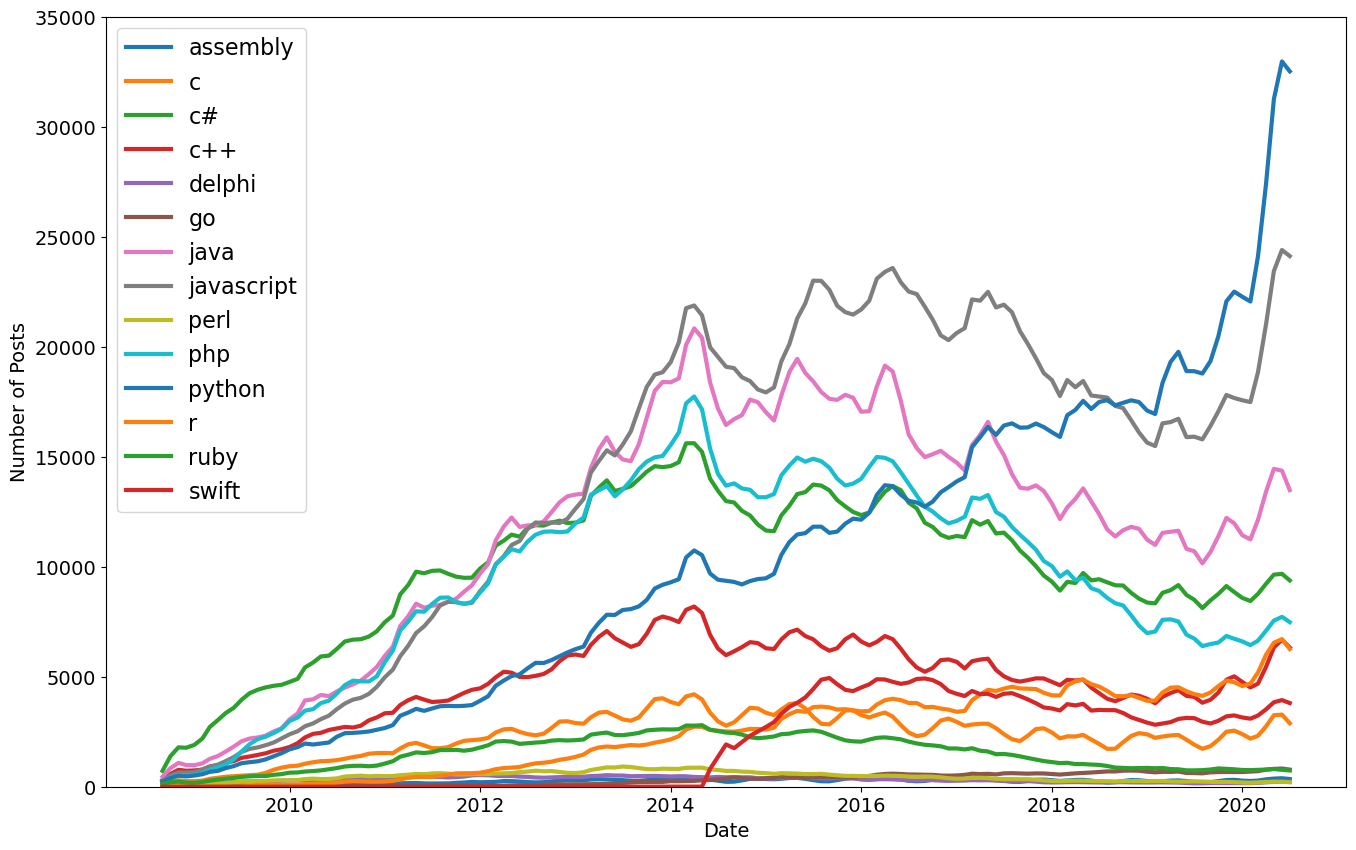

In [70]:
roll_df = reshaped_df.rolling(window = 3).mean()

plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth = 3, label = roll_df[column].name)
    
plt.legend(fontsize = 16)

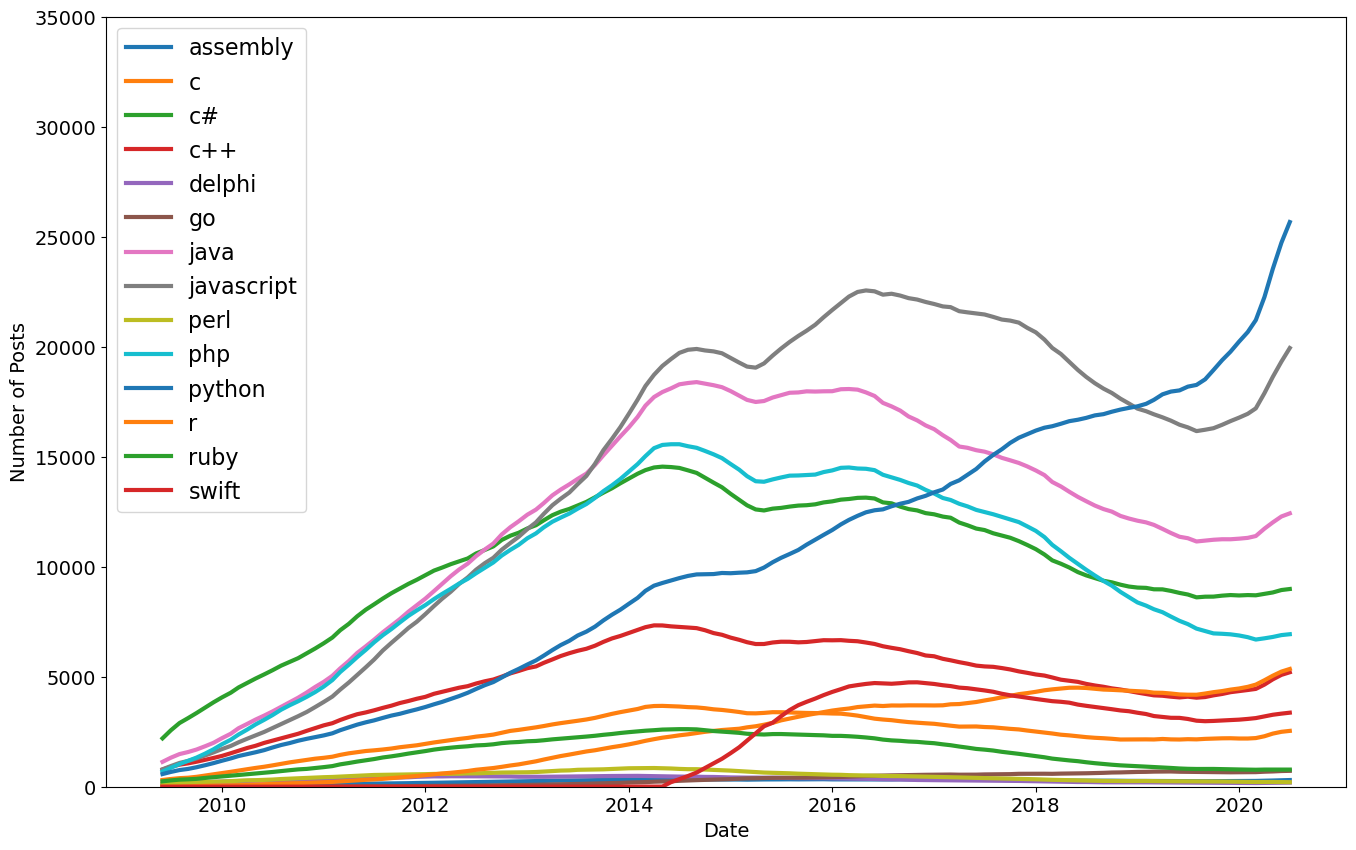

In [71]:
roll_df = reshaped_df.rolling(window = 12).mean()

plt.figure(figsize = (16, 10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Posts', fontsize = 14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth = 3, label = roll_df[column].name)
    
plt.legend(fontsize = 16)

# 핵심 학습내용 및 요약

· .groupby()를 사용하여 개발 언어당 게시물 및 항목 수 탐색

· 더 쉽게 표시하기 위해 to_datetime()을 사용하여 문자열을 날짜 객체로 변환

· .pivot()을 사용하여 범주를 열로 변환하여 데이터프레임을 재구성

· .count()와 isna().values.any()를 사용하여 데이터프레임에서 NaN 값을 찾은 다음, .fillna()를 사용하여 대체

· for루프와 .plot()을 사용하여 (여러 개의) 꺾은선형 차트를 생성

· 크기, 레이블, 축의 상한 및 하한을 변경하여 차트의 스타일을 지정

· 색상으로 라인을 구분하기 위해 범례를 추가

· .rolling().mean()을 사용하여 시계열 관측치를 매끄럽게 만들고 시간 경과에 따른 추세를 더 잘 알아볼 수 있도록 표시